In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_card = pd.read_csv("/Users/mahirajkhakhri/Desktop/Data-Analysis/CreditCard-Fraud-Detection/creditcard.csv")
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
rows, columns = credit_card.shape
print(f"No. of Rows: {rows}")
print(f"No. of Columns: {columns}")

No. of Rows: 284807
No. of Columns: 31


In [4]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card.duplicated().sum()

1081

In [7]:
credit_card.duplicated().any()

True

In [8]:
credit_card.shape

(284807, 31)

In [9]:
data = credit_card.drop_duplicates()
data.shape

(283726, 31)

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
data.duplicated().any()

False

In [12]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class'>

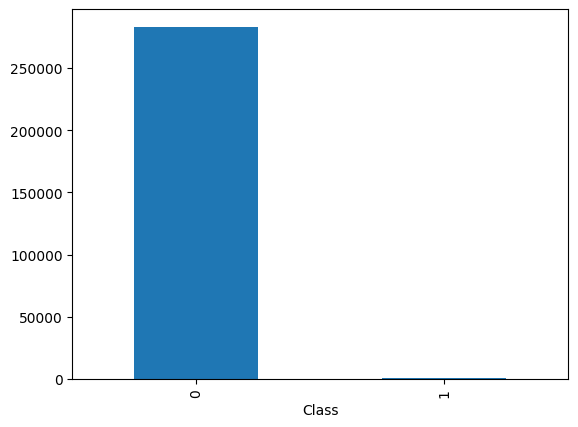

In [13]:
data['Class'].value_counts().plot(kind='bar')

In [14]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [15]:
X = data.drop(columns=['Class'])
Y = data['Class']

In [16]:
X.shape

(283726, 30)

In [17]:
Y.shape

(283726,)

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(X, Y)

In [20]:
x_smote.shape

(566506, 30)

In [21]:
y_smote.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

# DATA VISUALIZATION

In [22]:
fraud_data = data[data['Class']== 0]
legit_data = data[data ['Class']== 1]

<Axes: ylabel='Frequency'>

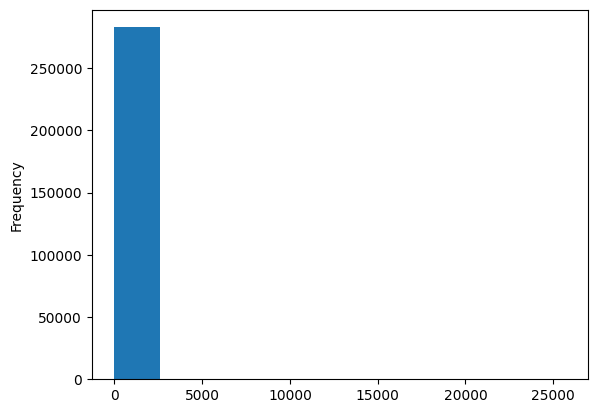

In [23]:
fraud_data['Amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

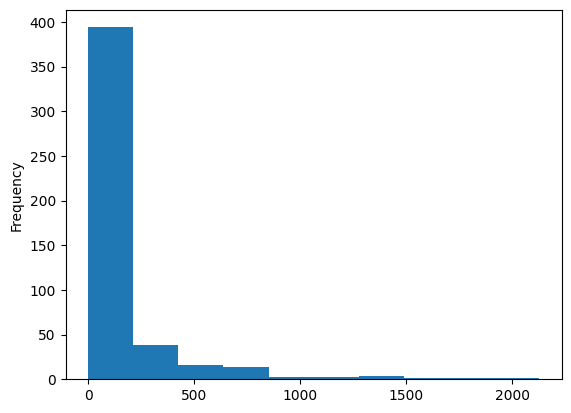

In [24]:
legit_data['Amount'].plot(kind='hist')

In [25]:
corr_imblnc = data.corr()
corr_imblnc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


Text(0.5, 1.0, 'Correlation Matrix for Imbalanced Data')

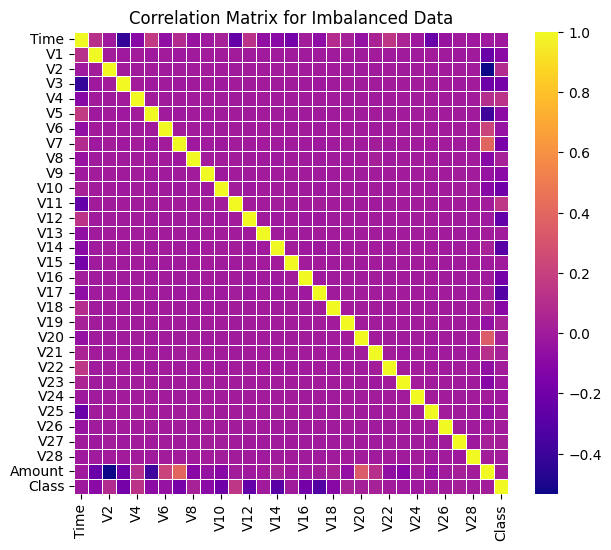

In [26]:
corr_imblnc = data.corr()
plt.figure(figsize = (7,6))
sns.heatmap(corr_imblnc, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Imbalanced Data")


Text(0.5, 1.0, 'Correlation Matrix for Imbalanced Data')

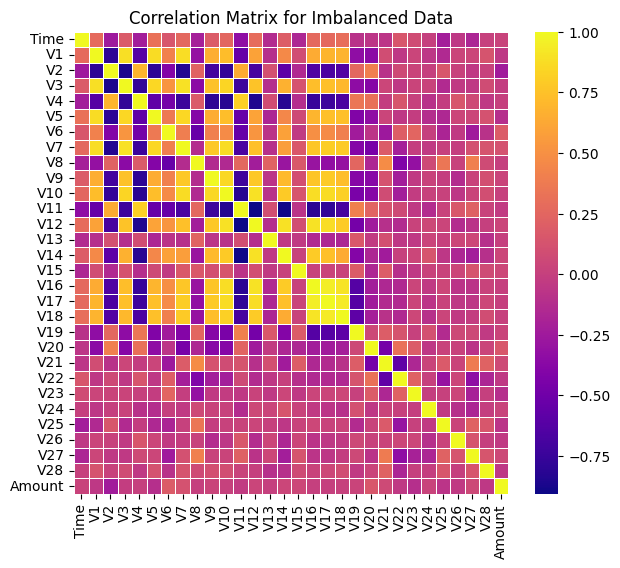

In [27]:
corr_imblnc = x_smote.corr()
plt.figure(figsize = (7,6))
sns.heatmap(corr_imblnc, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Imbalanced Data")


Text(0.5, 1.0, 'Class Distribution')

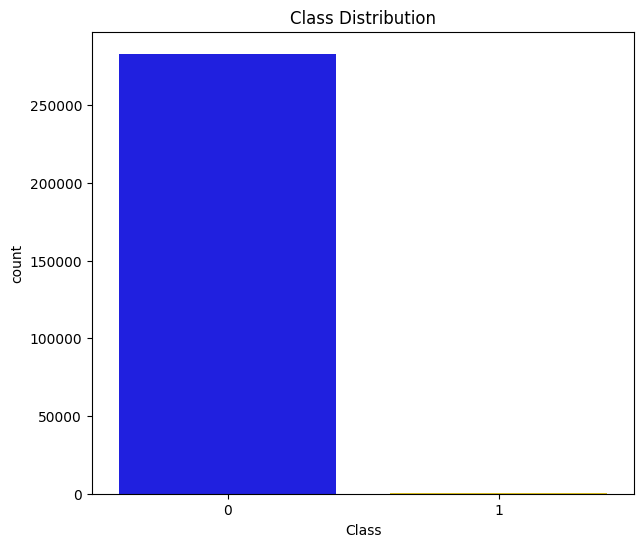

In [28]:
custom_palette = sns.color_palette(["Blue", "Gold"])
plt.figure(figsize = (7,6))
sns.countplot(x="Class", hue="Class", data=data, palette=custom_palette, legend=False)
plt.title("Class Distribution")

/var/folders/7j/xr8js46x2r3_jdh213kqgtt80000gn/T/ipykernel_29476/2218811470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette=custom_palette, legend=False)


Text(0, 0.5, 'Count')

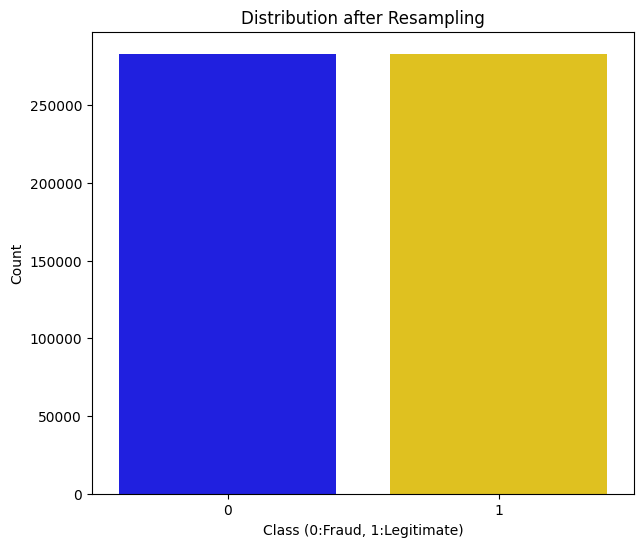

In [29]:
custom_palette = sns.color_palette(["Blue", "Gold"])
plt.figure(figsize = (7,6))
sns.countplot(x=y_smote, palette=custom_palette, legend=False)
plt.title("Distribution after Resampling")
plt.xlabel("Class (0:Fraud, 1:Legitimate)")
plt.ylabel("Count")

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_model = LogisticRegression(random_state=42,  max_iter=1000)
logistic_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [38]:
y_pre_logistic = logistic_model.predict(X_test)

#### Classification Report:

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
classification_report_logistic  = classification_report(y_test, y_pre_logistic)
print(classification_report_logistic)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     56463
           1       0.99      0.96      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



#### Confusion Matrix :

In [46]:
classification_matrix_logistic = confusion_matrix(y_test, y_pre_logistic)
classification_matrix_logistic

array([[55754,   709],
       [ 2027, 54812]])

In [48]:
confusion_matrix_df = pd.DataFrame(classification_matrix_logistic, 
                                  columns = ["Predicted Negetive (0)", "Predicted Positive(1)"],
                                  index = ["Actual Negetive (0)", "Actual Positive(1)"])
confusion_matrix_df

,Predicted Negetive (0),Predicted Positive(1)
Actual Negetive (0),55754,709
Actual Positive(1),2027,54812


Text(58.22222222222221, 0.5, 'Actual')

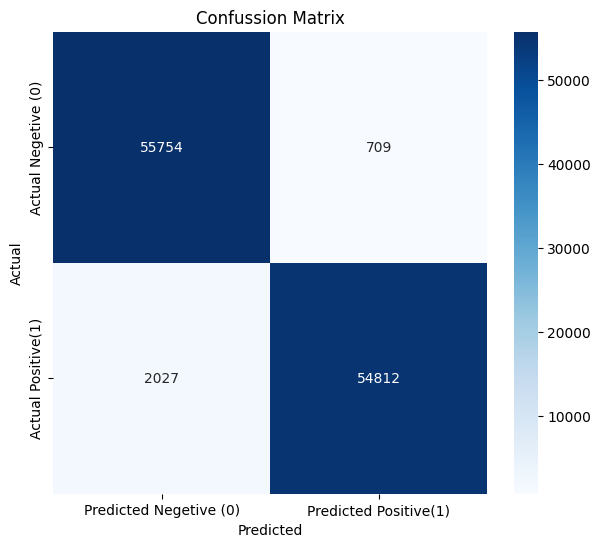

In [53]:
plt.figure(figsize = (7,6))
sns.heatmap(confusion_matrix_df, annot=True , fmt='d', cmap="Blues")
plt.title("Confussion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [57]:
transaction_data=pd.DataFrame({
    'Time' : [16],
     'V1' : [1.343425645],
     'V2' : [0.563425645],
     'V3' : [1.894579809],
     'V4' : [-0.34563556],
     'V5' : [1.789564655],
     'V6' : [-0.23654712],
     'V7' : [1.122134345],
     'V8' : [0.987654324],
     'V9' : [0.236975837],
     'V10' : [1.953467852],
     'V11' : [-0.23456789],
     'V12' : [0.769788765],
     'V13' : [1.213654879],
     'V14' : [1.786387234],
     'V15' : [0.652467983],
     'V16' : [-0.72364847],
     'V17' : [1.234568764],
     'V18' : [-1.67547264],
     'V19' : [-0.547376017],
     'V20' : [-0.091776347],
     'V21' : [-0.123363348],
     'V22' : [-0.090988094],
     'V23' : [0.5645673469],
     'V24' : [0.7861437819],
     'V25' : [0.0112373127],
     'V26' : [-0.098137832],
     'V27' : [0.8971346943],
     'Amount' : [0],
     'Class' : [0]
    
})
new_prediction = 

SyntaxError: incomplete input (1686180663.py, line 19)